In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

Design a query to retrieve the last 12 months of precipitation data and plot the results

In [11]:
# Explore columns in tables
from sqlalchemy import inspect

inspector = inspect(engine)
columns_measurement = inspector.get_columns('measurement')
print('-'*25)
print('Measurement Columns')
print('-'*25)
for column in columns_measurement:
    print(column["name"], column["type"])
print('-'*25)
print('Station Columns')
print('-'*25)
columns_station = inspector.get_columns('station')
for column in columns_station:
    print(column["name"], column["type"])

-------------------------
Measurement Columns
-------------------------
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
-------------------------
Station Columns
-------------------------
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
#Earliest Date 
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01')

In [13]:
# Latest Date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [14]:
# Latest 12 months query
last_12_months = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()

In [19]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df_12_mos = pd.DataFrame(last_12_months)
df_12_mos = df_12_mos.set_index('date')
df_12_mos = df_12_mos.dropna()
precip_dict = df_12_mos.to_dict()
precip_dict

{'prcp': {'2016-08-24': 1.45,
  '2016-08-25': 0.11,
  '2016-08-26': 0.01,
  '2016-08-27': 0.12,
  '2016-08-28': 2.07,
  '2016-08-29': 0.9,
  '2016-08-30': 0.05,
  '2016-08-31': 2.46,
  '2016-09-01': 0.01,
  '2016-09-02': 0.03,
  '2016-09-03': 1.0,
  '2016-09-04': 0.44,
  '2016-09-05': 0.18,
  '2016-09-06': 1.0,
  '2016-09-07': 1.35,
  '2016-09-08': 0.15,
  '2016-09-09': 0.35,
  '2016-09-10': 1.16,
  '2016-09-11': 0.6,
  '2016-09-12': 1.04,
  '2016-09-13': 1.2,
  '2016-09-14': 6.7,
  '2016-09-15': 3.35,
  '2016-09-16': 0.61,
  '2016-09-17': 0.23,
  '2016-09-18': 0.42,
  '2016-09-19': 0.25,
  '2016-09-20': 0.43,
  '2016-09-21': 1.02,
  '2016-09-22': 0.75,
  '2016-09-23': 0.33,
  '2016-09-24': 0.27,
  '2016-09-25': 0.04,
  '2016-09-26': 1.02,
  '2016-09-27': 1.0,
  '2016-09-28': 0.05,
  '2016-09-29': 1.49,
  '2016-09-30': 0.38,
  '2016-10-01': 1.02,
  '2016-10-02': 0.61,
  '2016-10-03': 0.46,
  '2016-10-04': 3.46,
  '2016-10-05': 0.81,
  '2016-10-06': 0.04,
  '2016-10-07': 0.01,
  '2016-1

In [15]:
# Sort the dataframe by date
df_12_mos = df_12_mos.sort_values('date', ascending=False)

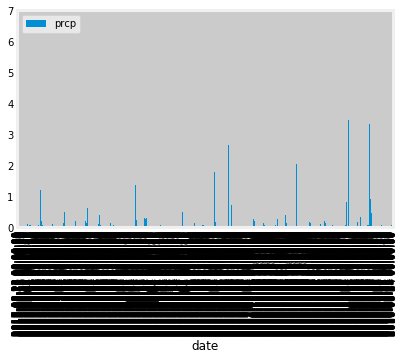

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
plot = df_12_mos.plot.bar()

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_12_mos.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [18]:
# Design a query to show how many stations are available in this dataset
session.query(Measurement.station).group_by(Measurement.station).count()

9

In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

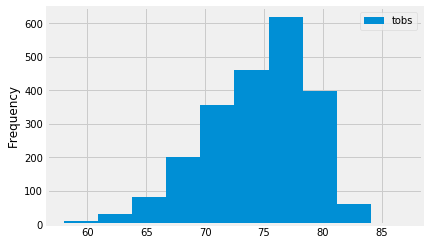

In [23]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_last_12_months = session.query(Measurement.tobs).filter(Measurement.date > '2016-08-23').all()
df_last_12_months = pd.DataFrame(tobs_last_12_months)
df_last_12_months.plot.hist()

In [24]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [25]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

* **Travel dates**: *2017-06-06*  to  *2017-06-26*
* **Previous year:**: *2016-06-06*  to  *2016-06-26*  

In [43]:
travel_temps = calc_temps('2016-06-06', '2016-26-26')
print(travel_temps)

[(60.0, 76.00980392156863, 84.0)]


Text(0.5,1,'Trip Avg Temp')

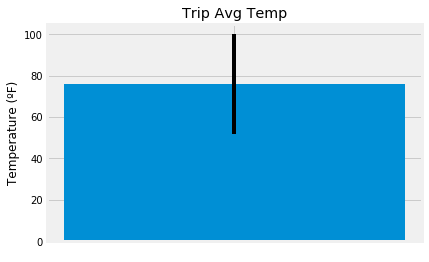

In [44]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.bar([" "], travel_temps[0][1], yerr=travel_temps[0][2]-travel_temps[0][0], align='center')
plt.ylabel("Temperature (ºF)")
plt.title("Trip Avg Temp")

In [48]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
rainfall_query = session.query(
    Measurement.station, 
    Measurement.date, 
    Measurement.prcp,
    Station.name,
    Station.latitude,
    Station.longitude,
    Station.elevation).\
    filter(Measurement.date >= '2016-06-06').filter(Measurement.date <= '2016-26-06').filter(Measurement.station == Station.station).\
    order_by(Measurement.prcp.desc()).all()
rf_df = pd.DataFrame(rainfall_query)
rf_df

,station,date,prcp,name,latitude,longitude,elevation
0,USC00519281,2016-07-25,9.64,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
1,USC00513117,2016-07-25,7.65,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,USC00516128,2016-09-14,6.70,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
3,USC00516128,2016-07-25,5.35,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
4,USC00519397,2016-07-25,4.20,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
5,USC00519281,2016-08-01,3.53,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
6,USC00516128,2016-10-04,3.46,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
7,USC00516128,2016-09-15,3.35,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
8,USC00519523,2016-07-25,3.01,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
9,USC00516128,2016-07-31,2.90,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
